# 0 从极大似然估计到机器学习
——以一元线性回归任务为例

> 最大似然估计最吸引人的地方在于，它被证明当样本数目m趋近于无穷时，就收敛率而言是最好的渐近估计。

> ——《deep learning book》

求极大似然函数估计值的一般步骤：
（1） 写出似然函数；
（2） 对似然函数取对数，并整理；
（3） 求导数 ；
（4） 解似然方程 。

## 一元线性回归

一元线性回归的公式可以表示为$y=kx+b+\varepsilon$

其中，x是自变量，y是因变量，k是斜率，b是常数项，$\varepsilon$是随机误差，极大似然法认为随机误差$\varepsilon$服从$N(0,\sigma^2)$的正态分布。

即$$p(\varepsilon)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{\varepsilon^2}{2\sigma^2}}$$

(1) 写出似然函数

$$L=\prod\limits_{i=1}^{n}p({\varepsilon_i})
=\prod\limits_{i=1}^{n}\frac{1}{\sqrt{2\pi}\sigma}e^-{\frac{\varepsilon_i^2}{2\sigma^2}}$$

(2)对似然函数取对数

$$log(L)=\sum\limits_{i=1}^n[-log(\sqrt{2\pi}\sigma)-{\frac{\varepsilon_i^2}{2\sigma^2}}]$$

又因为$\varepsilon_i=y_i-kx_i-b$

$$log(L)=\sum\limits_{i=1}^n[-log(\sqrt{2\pi}\sigma)-{\frac{(y_i-kx_i-b)^2}{2\sigma^2}}]$$

想要最大化极大似然函数，只需要极小化$(y_i-kx_i-b)^2$，因为其他的量都是常量
！注：这里是和最小二乘法的目标是一致的，不过要注意，仅仅在这个特例下一致，在有些时候，极大似然估计和最小二乘估计并不是一致的。

以往的思路中是通过求导解似然方程的方式，分别对k，b求偏导，令导数为0，即可求出极值，即

$$\hat k=\frac{\sum\limits_{i=1}^n(x_i-\bar x)(y_i-\bar y)}{\sum\limits_{i=1}^n(x_i-\bar x)^2}$$

$$\hat b=\bar y-\hat k\bar x$$

## 机器学习中的一元线性回归

在神经网络机器学习，则是通过另一种方式求得：通过人工指定一个$k_0$和$b_0$，通过梯度下降的方式，求得似然函数的极值（梯度下降只能求得函数的极小值，求似然函数的极大值是通过求$\sum\limits(y_i-kx_i-b)$的极小值实现的）。

### 梯度下降-神经网络的基本原理

神经网络通过人工指定一个$k_0$和$b_0$，然后求取$\sum\limits(y_i-kx_i-b)$关于k，b在此时的导数，以一定的学习速率$\theta$沿梯度下降，从而最小化$\sum\limits(y_i-kx_i-b)$

在一元线性回归模型中，一个特别好的性质是$\sum\limits(y_i-kx_i-b)$关于k，b的函数是凸函数，通过调整合适的学习速率，我们就一定可以得到十分接近估计值的k和b

# 一个一元线性回归的实例
用回归模型预测木材剩余物

伊春林区位于黑龙江省东北部。全区有森林面积218.9732万公顷，木材蓄积量为2.324602亿m3。森林覆盖率为62.5%，是我国主要的木材工业基地之一。1999年伊春林区木材采伐量为532万m3。按此速度44年之后，1999年的蓄积量将被采伐一空。所以目前亟待调整木材采伐规划与方式，保护森林生态环境。为缓解森林资源危机，并解决部分职工就业问题，除了做好木材的深加工外，还要充分利用木材剩余物生产林业产品，如纸浆、纸袋、纸板等。因此预测林区的年木材剩余物是安排木材剩余物加工生产的一个关键环节。下面，利用一元线性回归模型预测林区每年的木材剩余物。显然引起木材剩余物变化的关键因素是年木材采伐量。

给出伊春林区16个林业局1999年木材剩余物和年木材采伐量数据如下。观测点近似服从线性关系。建立一元线性回归模型

## 数据的直观展示

In [44]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

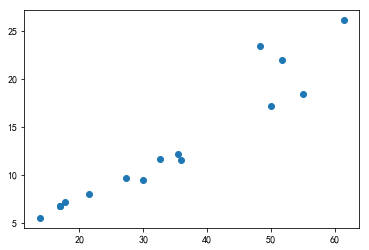

In [45]:
x = [61.4,48.3,51.8,35.9,17.8,17.0,55,32.7,17.0,27.3,21.5,35.5,17.0,50.0,30.0,13.8]
y = [26.13,23.49,21.97,11.53,7.18,6.80,18.43,11.69,6.80,9.69,7.99,12.15,6.80,17.20,9.50,5.52]
plt.scatter(x,y)

## 经典OLS

In [1]:
import statsmodels.api as sm

x = [61.4,48.3,51.8,35.9,17.8,17.0,55,32.7,17.0,27.3,21.5,35.5,17.0,50.0,30.0,13.8]
y = [26.13,23.49,21.97,11.53,7.18,6.80,18.43,11.69,6.80,9.69,7.99,12.15,6.80,17.20,9.50,5.52]

x_ = sm.add_constant(x)
regressor_OLS = sm.OLS(endog = y, exog = x_).fit()
regressor_OLS.summary()

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           8.30e-09
Time:                        09:57:55   Log-Likelihood:                -33.013
No. Observations:                  16   AIC:                             70.03
Df Residuals:                      14   BIC:                             71.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7629      1.221     -0.625      0.542      -3.382       1.856
x1             0.4043      0.033     12.113      0.000       0.333       0.476
==============================================================================
Omnibus:                        2.117   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                0.856
Skew:                           0.554   Prob(JB):                        0.652
Kurtosis:                       3.235   Cond. No.                         87.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 机器学习方法1.0

我们首先通过完全手写的方式，来实现一次最简单的神经网络，注意，这个神经网络只有两个需要学习的参数k、b，我们将通过手动求导的方式，进行反向传播。

In [7]:
x = [61.4,48.3,51.8,35.9,17.8,17.0,55,32.7,17.0,27.3,21.5,35.5,17.0,50.0,30.0,13.8]
y = [26.13,23.49,21.97,11.53,7.18,6.80,18.43,11.69,6.80,9.69,7.99,12.15,6.80,17.20,9.50,5.52]

k,b = 0,0
error=None
def Derivative(k,b):
    dk = sum([-2*xi*(yi-k*xi-b) for xi,yi in zip(x,y)])
    db = sum([-2*(yi-k*xi-b) for xi,yi in zip(x,y)])
    error = sum([(yi-k*xi-b)**2 for xi,yi in zip(x,y)])
    return k-0.00001*dk,b-0.01*db,error
for i in range(1000):
    if i%100==0:
        print(k,b,error)
    k,b,error = Derivative(k,b)

0 0 None
0.3981405880791939 -0.5350721488407616 58.21208419551689
0.4040726517595454 -0.755240093404616 58.052496404042685
0.4042728033288974 -0.7626686986927596 58.052314724488774
0.40427955656906356 -0.762919344519683 58.052314517659305
0.4042797844276454 -0.7629278014679431 58.052314517423824
0.4042797921157376 -0.7629280868107092 58.05231451742352
0.4042797923751388 -0.7629280964383559 58.05231451742356
0.4042797923838911 -0.7629280967631988 58.05231451742355
0.4042797923841864 -0.7629280967741576 58.05231451742356


## 机器学习方法2.0

这里我们尝试使用tensorflow神经网络框架实现同样的神经网络结构，并使用框架自带的反向传播优化器进行优化

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib import slim

x = [61.4,48.3,51.8,35.9,17.8,17.0,55,32.7,17.0,27.3,21.5,35.5,17.0,50.0,30.0,13.8]
y = [26.13,23.49,21.97,11.53,7.18,6.80,18.43,11.69,6.80,9.69,7.99,12.15,6.80,17.20,9.50,5.52]
x = np.array(x).reshape([-1,1])
y = np.array(y).reshape([-1,1])

x_placeholder = tf.placeholder(tf.float32,shape=[None,1])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])
#################################
W = tf.Variable(tf.zeros([1,1]))
b = tf.Variable(tf.zeros([1,1]))
y_p = tf.matmul(x_placeholder,W)+b
#################################
loss = tf.reduce_sum((y_p-y_placeholder)**2)
train = tf.train.AdamOptimizer().minimize(loss) # 框架会自动进行求导，反向传播，并进行参数优化
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        if i%1000==0:
            _ = sess.run([W,b,loss],feed_dict={x_placeholder:x,y_placeholder:y})
            print(_)
        sess.run(train,feed_dict={x_placeholder:x,y_placeholder:y})
# 重设默认图
tf.reset_default_graph()

[array([[0.]], dtype=float32), array([[0.]], dtype=float32), 3238.6912]
[array([[0.37504187]], dtype=float32), array([[0.3519281]], dtype=float32), 61.56008]
[array([[0.37805682]], dtype=float32), array([[0.28696278]], dtype=float32), 61.1187]
[array([[0.38077748]], dtype=float32), array([[0.1780673]], dtype=float32), 60.51558]
[array([[0.38472852]], dtype=float32), array([[0.01992275]], dtype=float32), 59.7572]
[array([[0.3898208]], dtype=float32), array([[-0.1839131]], dtype=float32), 58.98495]
[array([[0.39541033]], dtype=float32), array([[-0.40770826]], dtype=float32), 58.403343]
[array([[0.40026125]], dtype=float32), array([[-0.601971]], dtype=float32), 58.124374]
[array([[0.40318114]], dtype=float32), array([[-0.7189207]], dtype=float32), 58.057724]
[array([[0.4041519]], dtype=float32), array([[-0.757804]], dtype=float32), 58.05238]


In [8]:
# variable scope 和slim的使用
from tensorflow.contrib import slim

x = [61.4,48.3,51.8,35.9,17.8,17.0,55,32.7,17.0,27.3,21.5,35.5,17.0,50.0,30.0,13.8]
y = [26.13,23.49,21.97,11.53,7.18,6.80,18.43,11.69,6.80,9.69,7.99,12.15,6.80,17.20,9.50,5.52]
x = np.array(x).reshape([-1,1])
y = np.array(y).reshape([-1,1])

x_placeholder = tf.placeholder(tf.float32,shape=[None,1])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])
###############################
with tf.variable_scope('net'):
    y_p=slim.fully_connected(x_placeholder,1,
                             weights_initializer=tf.random_normal_initializer,
                             biases_initializer=tf.random_normal_initializer,
                             scope='layer')
###############################
loss = tf.reduce_sum((y_p-y_placeholder)**2)
train = tf.train.AdamOptimizer().minimize(loss,var_list=tf.get_collection('trainable_variables',scope='net'))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(30000):
        if i%3000==0:
            _ = sess.run(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,scope='net'),feed_dict={x_placeholder:x,y_placeholder:y})
            print(_)
#             _ = sess.run(loss,feed_dict={x_placeholder:x,y_placeholder:y})
#             print(_)
        sess.run(train,feed_dict={x_placeholder:x,y_placeholder:y})
print(tf.get_collection('trainable_variables',scope='net'))
tf.reset_default_graph()

[array([[0.37409627]], dtype=float32), array([1.2152207], dtype=float32)]
[array([[0.40040913]], dtype=float32), array([-0.6072346], dtype=float32)]
[array([[0.4042797]], dtype=float32), array([-0.76292455], dtype=float32)]
[array([[0.4042794]], dtype=float32), array([-0.7629279], dtype=float32)]
[array([[0.4042798]], dtype=float32), array([-0.76292783], dtype=float32)]
[array([[0.4042798]], dtype=float32), array([-0.7629279], dtype=float32)]
[array([[0.4042797]], dtype=float32), array([-0.762928], dtype=float32)]
[array([[0.40427977]], dtype=float32), array([-0.76292783], dtype=float32)]
[array([[0.4042798]], dtype=float32), array([-0.7629277], dtype=float32)]
[array([[0.40427977]], dtype=float32), array([-0.76292783], dtype=float32)]
[<tf.Variable 'net/layer/weights:0' shape=(1, 1) dtype=float32_ref>, <tf.Variable 'net/layer/biases:0' shape=(1,) dtype=float32_ref>]


In [6]:
# tensorflow2.0 推荐的新方式
import tensorflow as tf
import numpy as np

x = [61.4,48.3,51.8,35.9,17.8,17.0,55,32.7,17.0,27.3,21.5,35.5,17.0,50.0,30.0,13.8]
y = [26.13,23.49,21.97,11.53,7.18,6.80,18.43,11.69,6.80,9.69,7.99,12.15,6.80,17.20,9.50,5.52]
x = np.array(x).reshape([-1,1])
y = np.array(y).reshape([-1,1])

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1, activation=None)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

model.fit(x, y, epochs=10000,verbose=0)

model.predict(x)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers[0].weights

[<tf.Variable 'dense_2/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.40427712]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-0.76282233], dtype=float32)>]